In [1]:
import numpy as np
import pandas as pd

In [2]:
import matplotlib.pyplot as plt

In [3]:
import seaborn as sns
%matplotlib inline

In [4]:
plt.style.use('seaborn-dark')

In [5]:
train = pd.read_csv('train_dPrl03o/train.csv')

In [6]:
test = pd.read_csv('test_mPTIhGU/test.csv')

In [7]:
ss = pd.read_csv('sample_submission_cxCGjdN.csv')

In [8]:
train.head()

video_id                                              title  \
0     53364  Alif Allah Aur Insaan Episode 34 HUM TV Drama ...   
1     51040  It's Showtime Miss Q & A: Bela gets jealous of...   
2      1856  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ \n  ಕ್...   
3     22618       Havana - swing cover | dodie feat. FLASHBACK   
4     74074  MUMMY NE NI KEHTA - 2  FT. 102 NOT OUT| DUDE S...   

           channel_title  category_id publish_date  \
0                 HUM TV         24.0   2017-12-12   
1  ABS-CBN Entertainment         24.0   2018-03-08   
2     SANDALWOOD REVIEWS         24.0   2018-03-26   
3            doddleoddle         10.0   2018-02-21   
4         Dude Seriously         23.0   2018-05-10   

                                                tags     views  dislikes  \
0  HUM|"TV"|"Alif Allah Aur Insaan"|"Episode 34"|...  351430.0     298.0   
1  ABS-CBN Entertainment|"ABS-CBN"|"ABS-CBN Onlin...  461508.0      74.0   
2  challenging star darshan latest news|"challeng...   40205.0     150.0   
3  havana|"cover"|"a capella"|"swing"|"dodie"|"fl...  509726.0     847.0   
4  dude|"seriously"|"friends"|"fun"|"gujarati"|"h...   74311.0      69.0   

   comment_count                                        description  \
0          900.0  Alif Allah Aur Insaan Episode 34 Full - 12 Dec...   
1          314.0  Vice Ganda notices Bela Padilla's sudden chang...   
2          100.0  ದರ್ಶನ್ ಗೆ ಬಾರಿ ಅವಮಾನ ಮಾಡಿದ ಶಿವಣ್ಣ ನಾಯಕಿ    ಕ್ಲ...   
3         4536.0  Hi hi hi! here's our vid on FLASHBACK's channe...   
4          161.0  BOOK YOUR TICKETS HERE:  https://goo.gl/QxdSyg...   

  country_code    likes  
0           CA   2351.0  
1           CA   3264.0  
2           IN    580.0  
3           GB  82773.0  
4           IN   3557.0

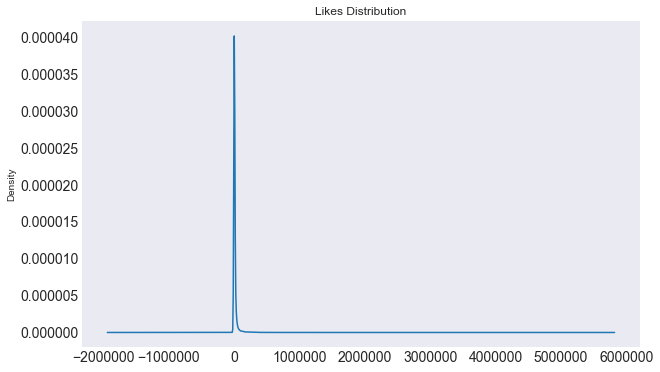

In [9]:
train['likes'].plot(kind = 'density', title = 'Likes Distribution', fontsize=14, figsize=(10, 6))

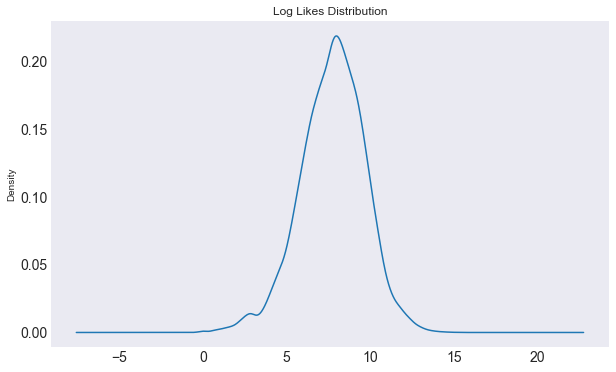

In [10]:
pd.Series(np.log1p(train['likes'])).plot(kind='density', title = 'Log Likes Distribution', fontsize=14, figsize=(10,6))

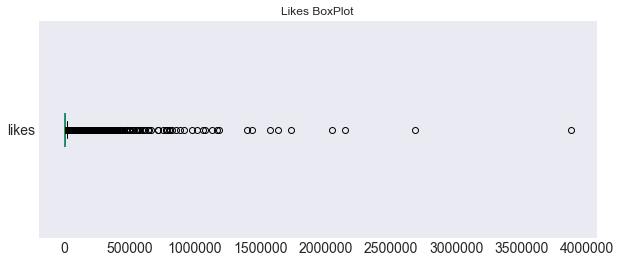

In [11]:
train['likes'].plot(kind='box', vert=False, figsize=(10,4), fontsize=14, title='Likes BoxPlot')

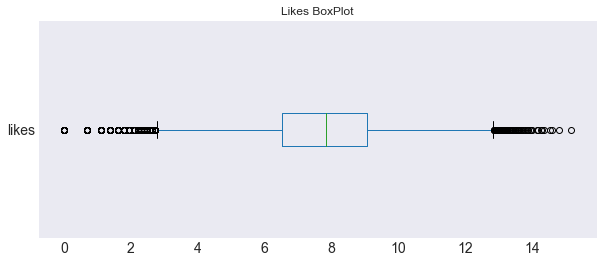

In [12]:
pd.Series(np.log1p(train['likes'])).plot(kind='box', vert=False, figsize=(10,4), fontsize=14, title='Likes BoxPlot')

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 26061 entries, 0 to 26060
Data columns (total 12 columns):
video_id         26061 non-null int64
title            26061 non-null object
channel_title    26061 non-null object
category_id      26061 non-null float64
publish_date     26061 non-null object
tags             26061 non-null object
views            26061 non-null float64
dislikes         26061 non-null float64
comment_count    26061 non-null float64
description      26061 non-null object
country_code     26061 non-null object
likes            26061 non-null float64
dtypes: float64(5), int64(1), object(6)
memory usage: 2.4+ MB


In [14]:
train.isnull().sum()

video_id         0
title            0
channel_title    0
category_id      0
publish_date     0
tags             0
views            0
dislikes         0
comment_count    0
description      0
country_code     0
likes            0
dtype: int64

In [15]:
train.isna().sum()

video_id         0
title            0
channel_title    0
category_id      0
publish_date     0
tags             0
views            0
dislikes         0
comment_count    0
description      0
country_code     0
likes            0
dtype: int64

In [16]:
train.nunique()

video_id         26061
title            26005
channel_title     5764
category_id         17
publish_date       348
tags             21462
views            25338
dislikes          2633
comment_count     4993
description      23426
country_code         4
likes            12134
dtype: int64

In [17]:
train.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

In [18]:
num_cols = ['views','dislikes','comment_count']

In [19]:
tar_col = 'likes'

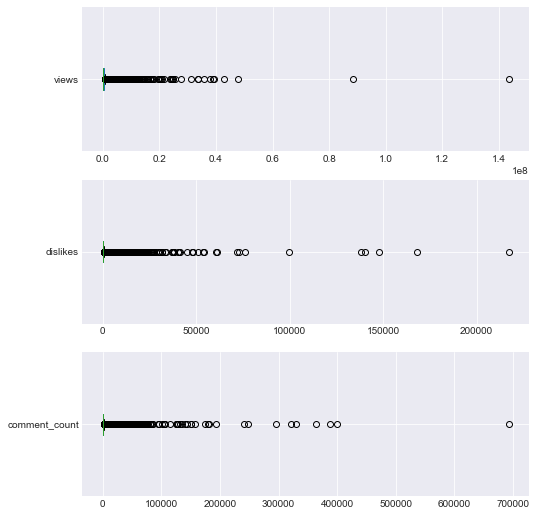

In [20]:
fig,axes = plt.subplots(3,1,figsize=(8,9))
for i,c in enumerate(num_cols):
    train[[c]].boxplot(ax=axes[i],vert=False)

In [21]:
for c in num_cols+['likes']:
    train[c] = np.log1p(train[c])

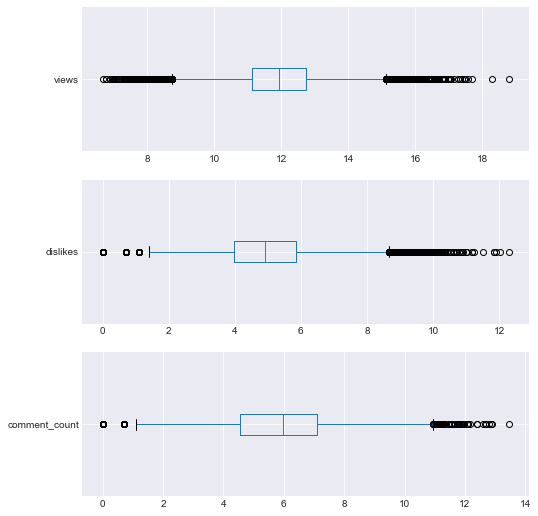

In [22]:
fig,axes = plt.subplots(3,1,figsize=(8,9))
for i,c in enumerate(num_cols):
    train[[c]].boxplot(ax=axes[i],vert=False)

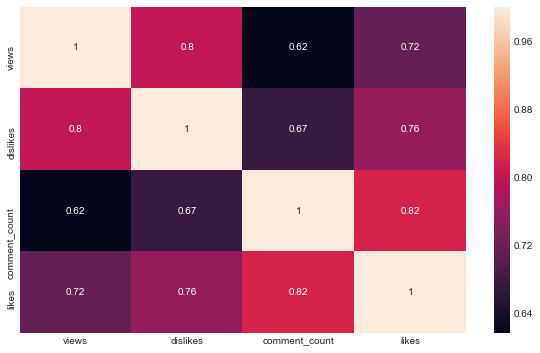

In [23]:
plt.figure(figsize=(10,6))
sns.heatmap(train[num_cols + ['likes']].corr(),annot=True)

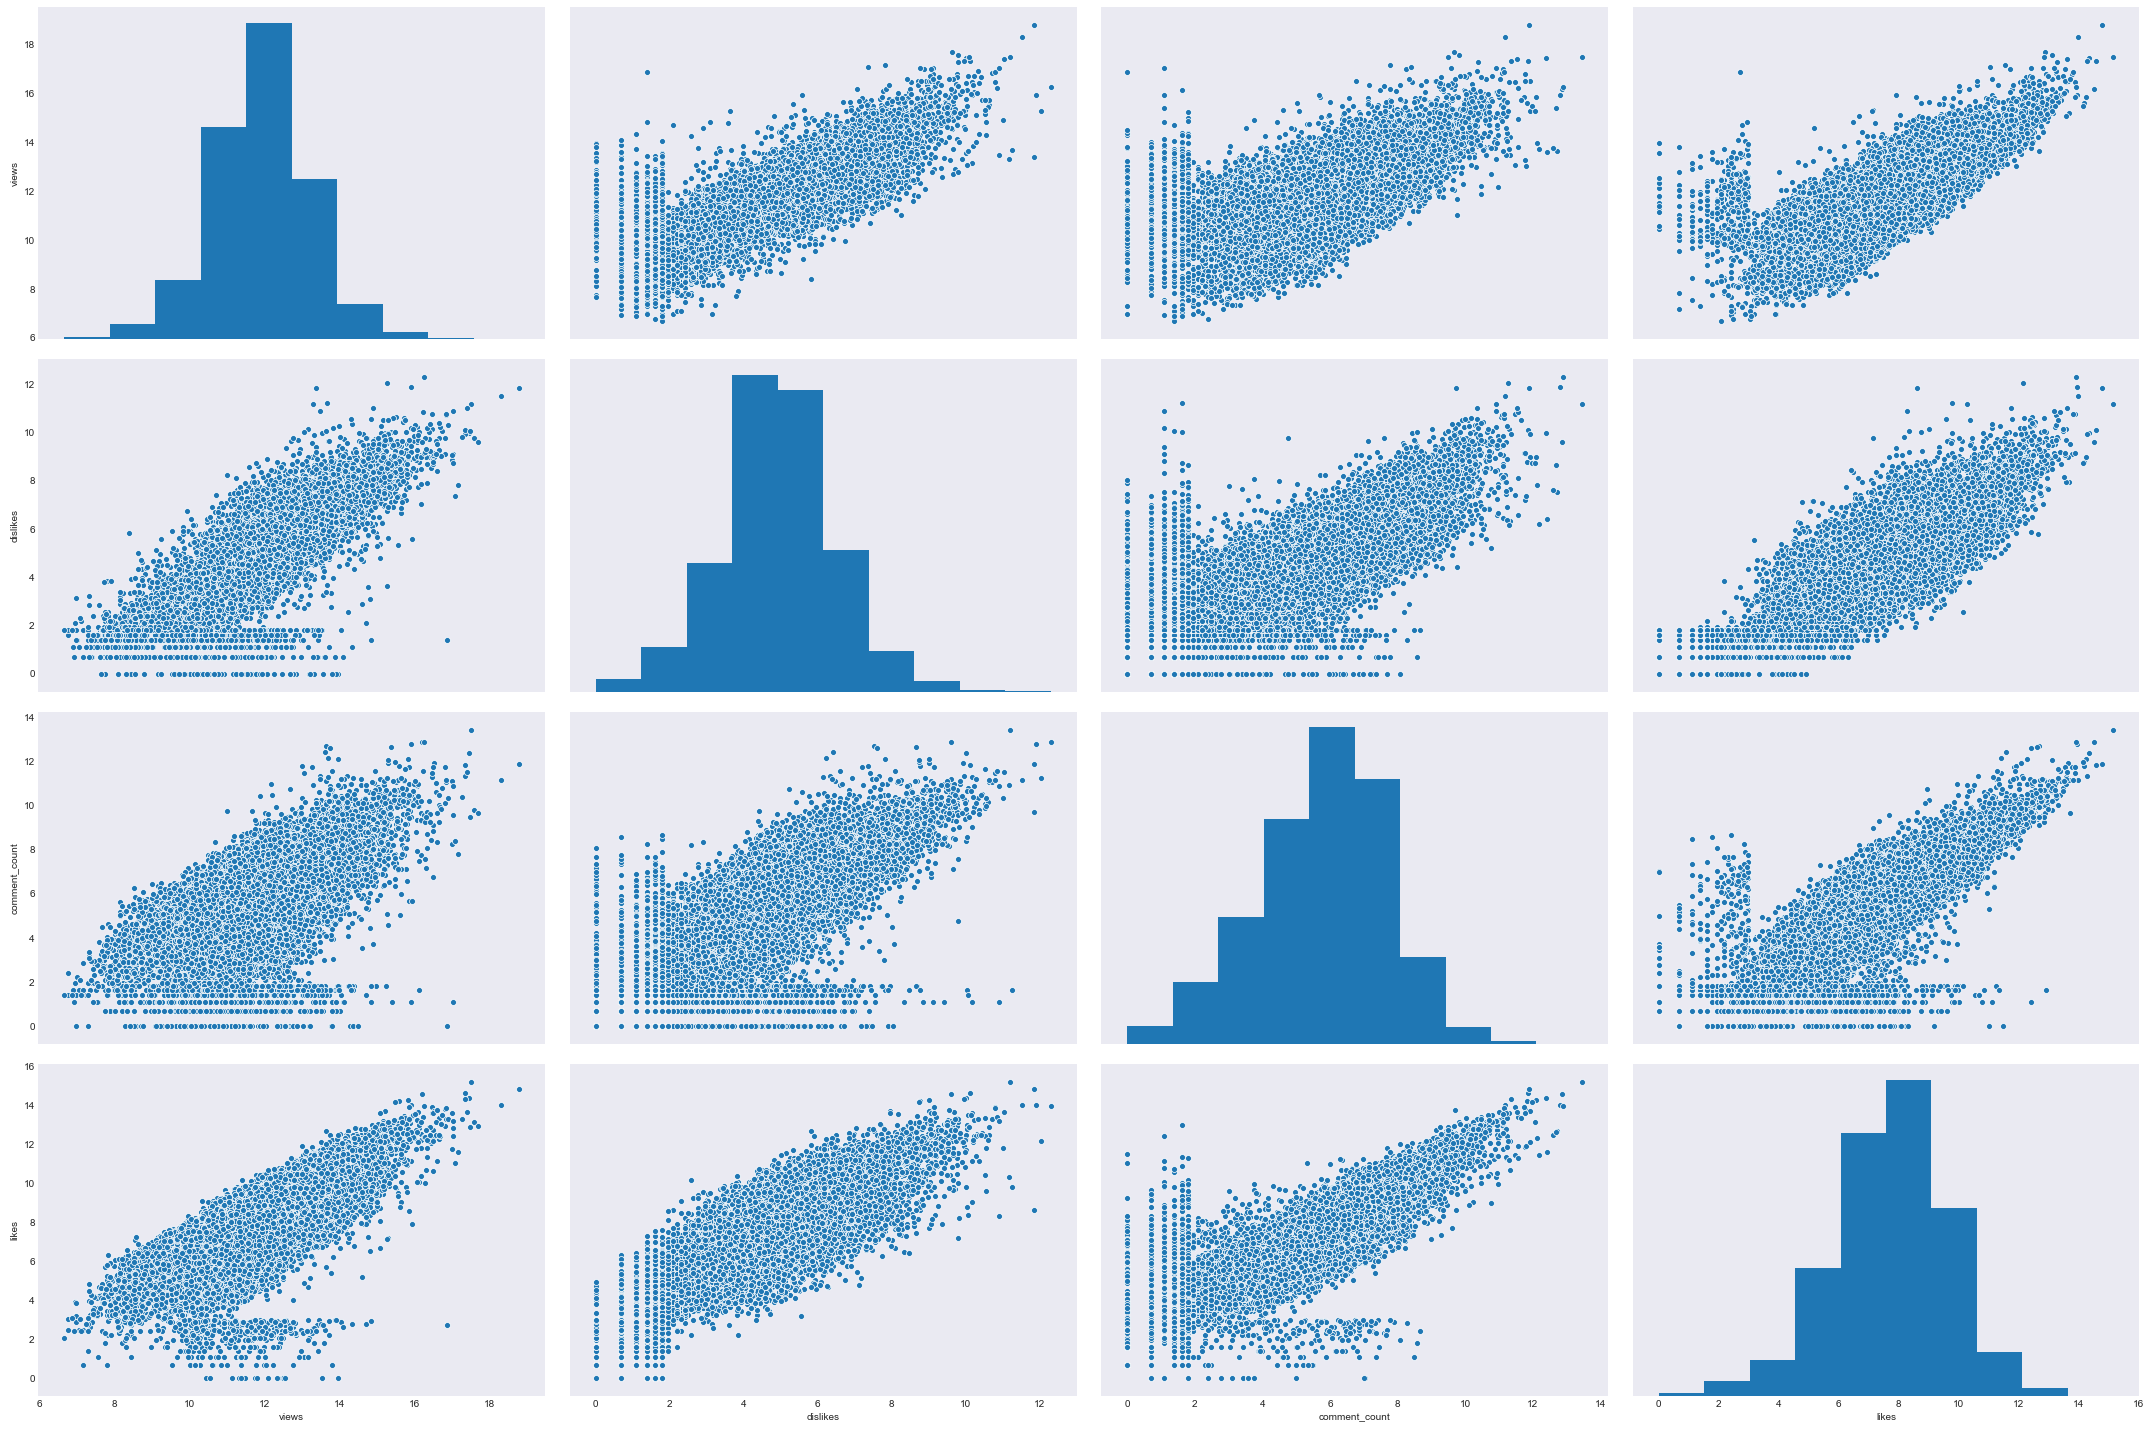

In [24]:
sns.pairplot(train[num_cols + ['likes']],height =5, aspect=24/16)

In [25]:
train.columns

Index(['video_id', 'title', 'channel_title', 'category_id', 'publish_date',
       'tags', 'views', 'dislikes', 'comment_count', 'description',
       'country_code', 'likes'],
      dtype='object')

In [26]:
cat_cols = ['category_id','country_code','channel_title']

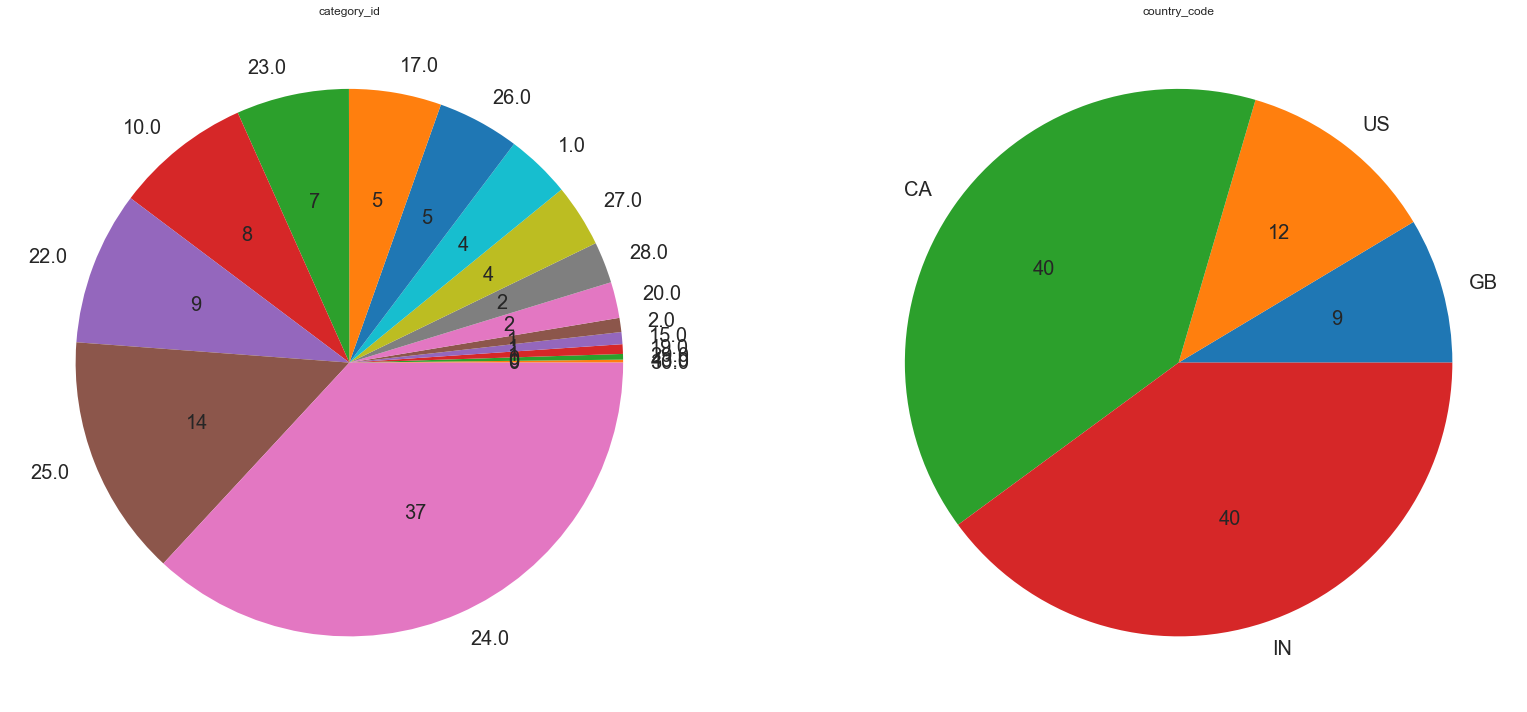

In [27]:
fig,axes = plt.subplots(1,2,figsize=(24,10))
for i,c in enumerate(['category_id','country_code']):
    train[c].value_counts()[::-1].plot(kind='pie',ax=axes[i],fontsize=20,title=c,autopct='%.0f')
    axes[i].set_ylabel('')
plt.tight_layout()

In [28]:
top_20_channels = train['channel_title'].value_counts()[:20].reset_index()
top_20_channels.columns = ['channel_title','num_videos']

Text(0.5, 1.0, 'Top 20 channels with maximu num of videos')

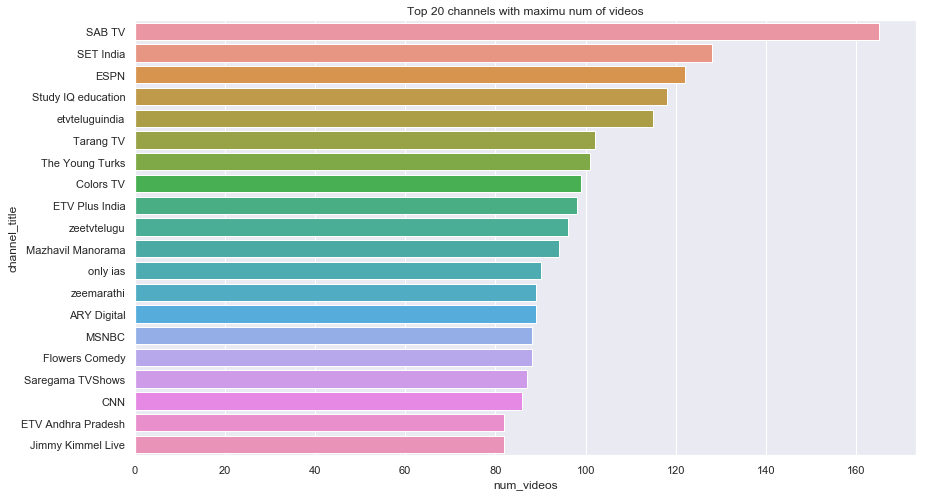

In [29]:
sns.set(rc={'figure.figsize':(14,8)})
sns.barplot(data=top_20_channels,y='channel_title',x='num_videos')
plt.title('Top 20 channels with maximu num of videos')

In [30]:
country_wise_channels = train.groupby(['country_code','channel_title']).size().reset_index()
country_wise_channels.columns = ['country_code','channel_title','num_videos']
country_wise_channels = country_wise_channels.sort_values(by = 'num_videos', ascending=False)

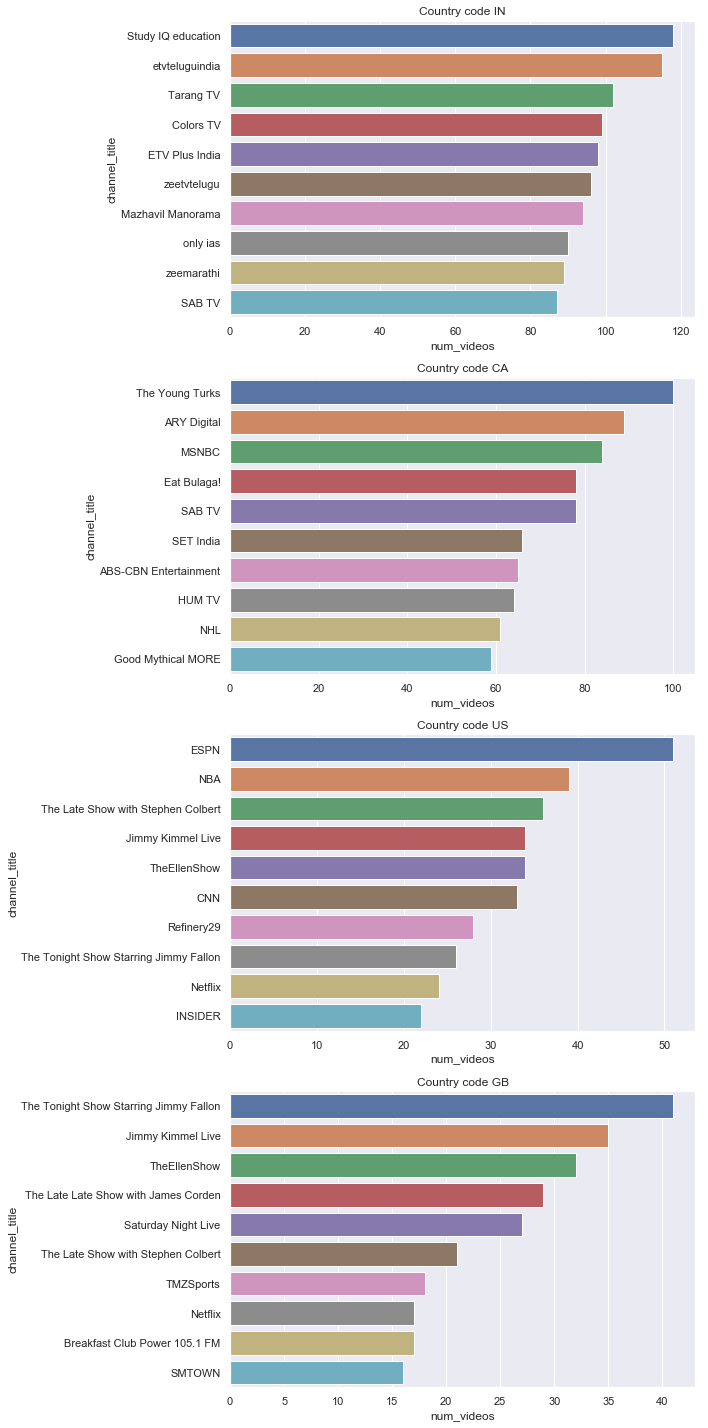

In [31]:
fig, axes = plt.subplots(4,1,figsize=(10,20))

for i,c in enumerate(country_wise_channels['country_code'].unique()):
    country = country_wise_channels[country_wise_channels['country_code']==c][:10]
    sns.barplot(data=country, x='num_videos', y='channel_title', ax=axes[i])
    axes[i].set_title(f'Country code {c}')
    
plt.tight_layout()

In [32]:
country_wise_channels = train.groupby(['country_code', 'channel_title'])['likes'].max().reset_index()
country_wise_channels = country_wise_channels.sort_values(by = 'likes', ascending = False)

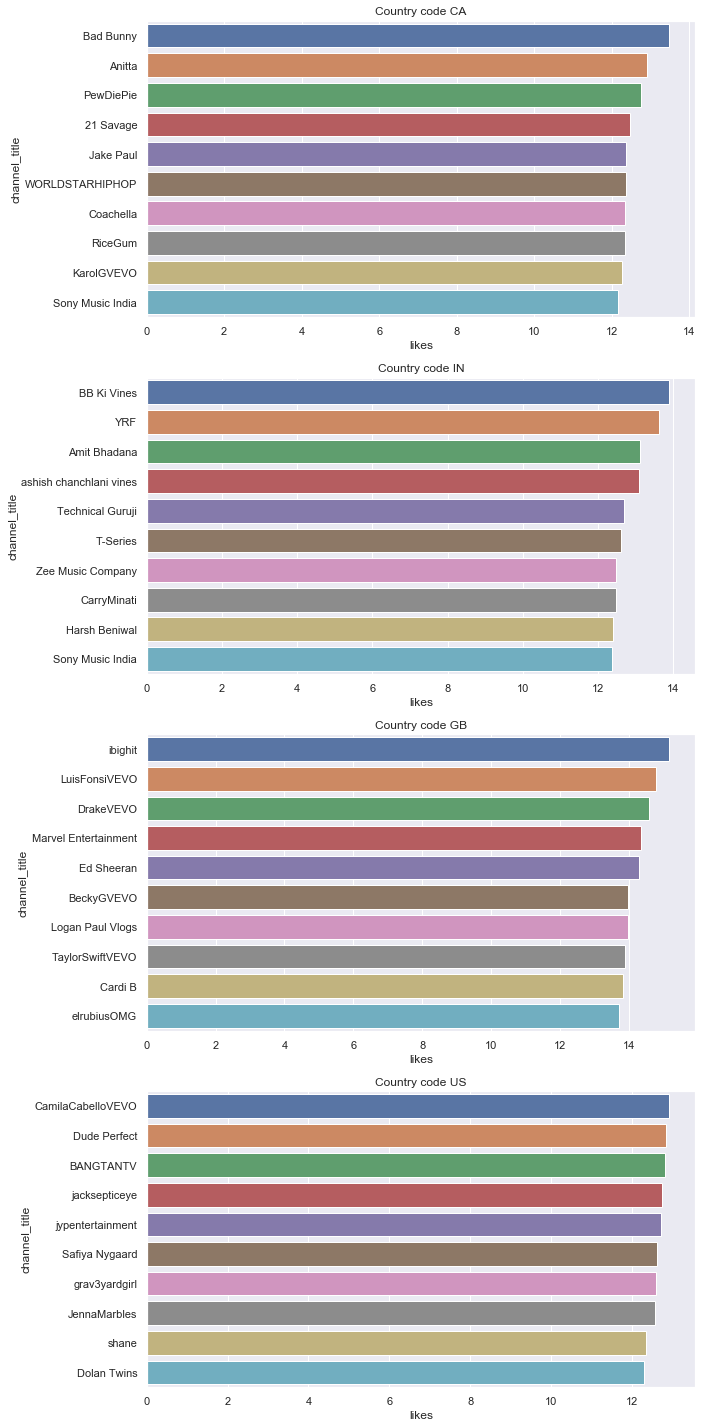

In [33]:
fig,axes = plt.subplots(4,1,figsize=(10,20))

for i,c in enumerate(train['country_code'].unique()):
    country = country_wise_channels[country_wise_channels['country_code']==c][:10]
    sns.barplot(data=country,x='likes',y='channel_title',ax=axes[i])
    axes[i].set_title(f'Country code {c}')
plt.tight_layout()

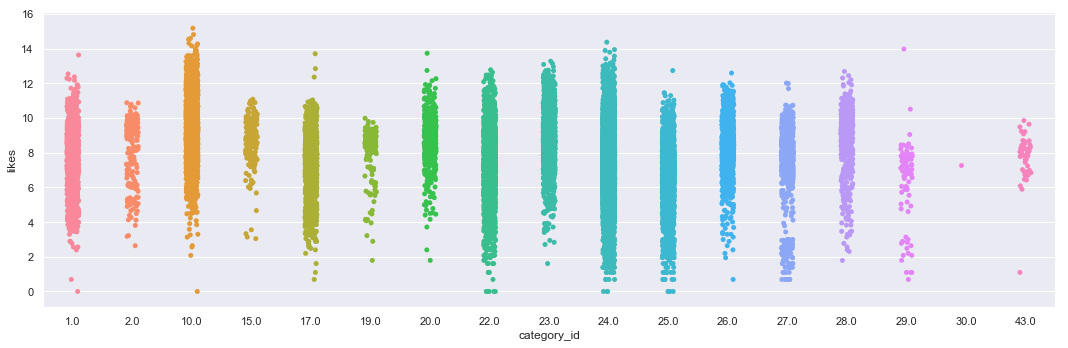

In [34]:
sns.catplot(data=train, x='category_id', y='likes', aspect=24/8)

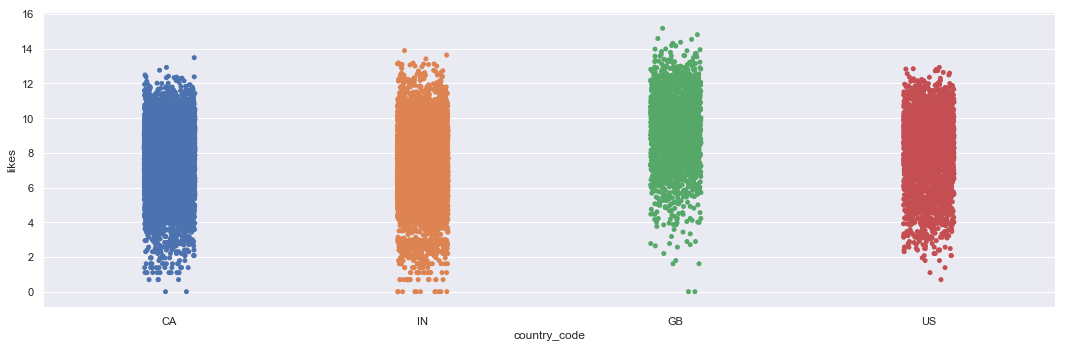

In [35]:
sns.catplot(data=train,x='country_code',y='likes', height=5,aspect=24/8)

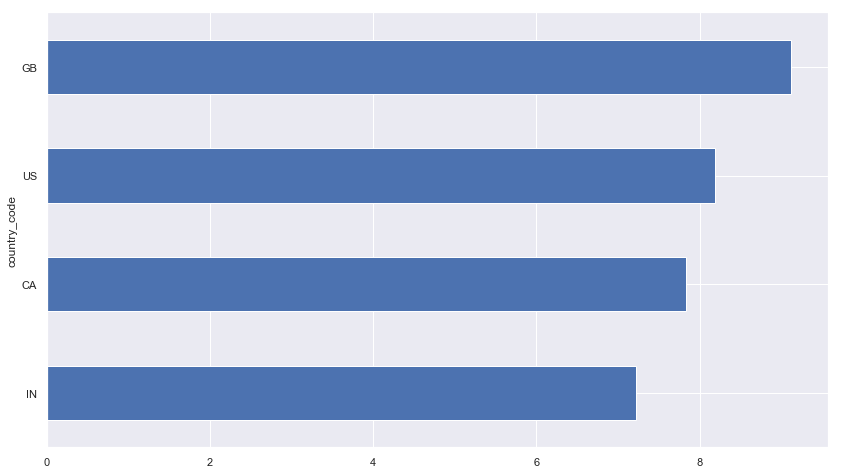

In [36]:
train.groupby('country_code')['likes'].mean().sort_values().plot(kind='barh')

In [37]:
train['publish_date'] = pd.to_datetime(train['publish_date'], format='%Y-%m-%d')
test['publish_date'] = pd.to_datetime(test['publish_date'], format='%Y-%m-%d')

In [38]:
train['publish_date'].min()

Timestamp('2006-07-23 00:00:00')

In [39]:
train['publish_date'].max()

Timestamp('2018-06-14 00:00:00')

In [40]:
train['publish_date'].dt.year.value_counts()

2018    18841
2017     7132
2015       16
2016       16
2011       13
2014        9
2013        9
2009        8
2012        6
2010        4
2008        3
2007        3
2006        1
Name: publish_date, dtype: int64

In [41]:
latest_train_data = train[train['publish_date']>'2017-11']
latest_test_data = test[test['publish_date']>'2017-11']

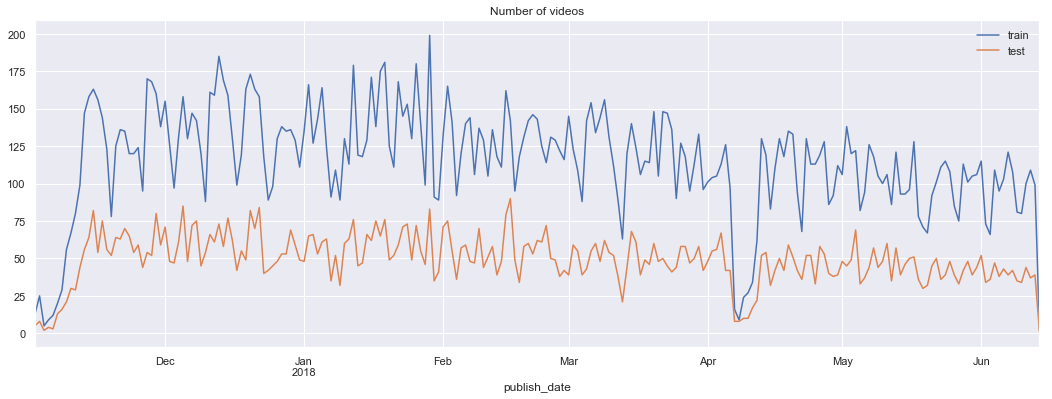

In [42]:
latest_train_data.sort_values(by='publish_date').groupby('publish_date').size().rename('train').plot(figsize=(18,6),title='Number of videos')
latest_test_data.sort_values(by='publish_date').groupby('publish_date').size().rename('test').plot(figsize=(18,6),title='Number of videos')
plt.legend()

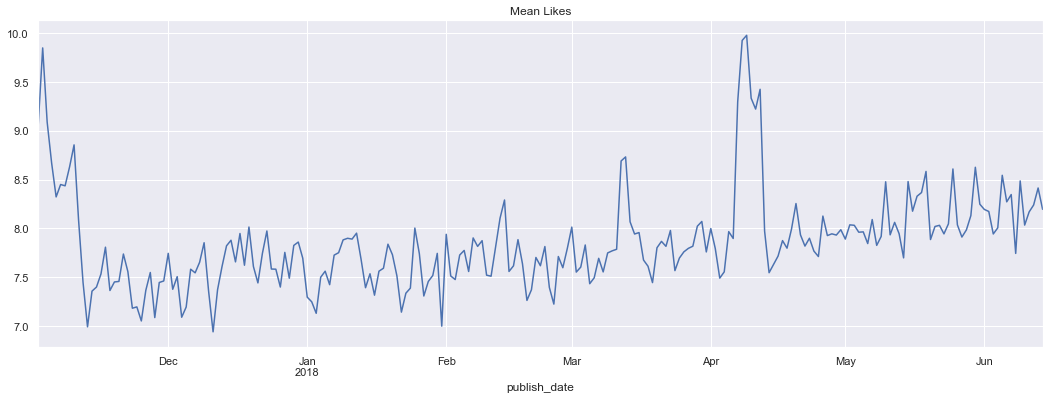

In [43]:
latest_data = train[train['publish_date']>'2017-11']
latest_data.sort_values(by='publish_date').groupby('publish_date')['likes'].mean().plot(figsize=(18,6),title='Mean Likes')

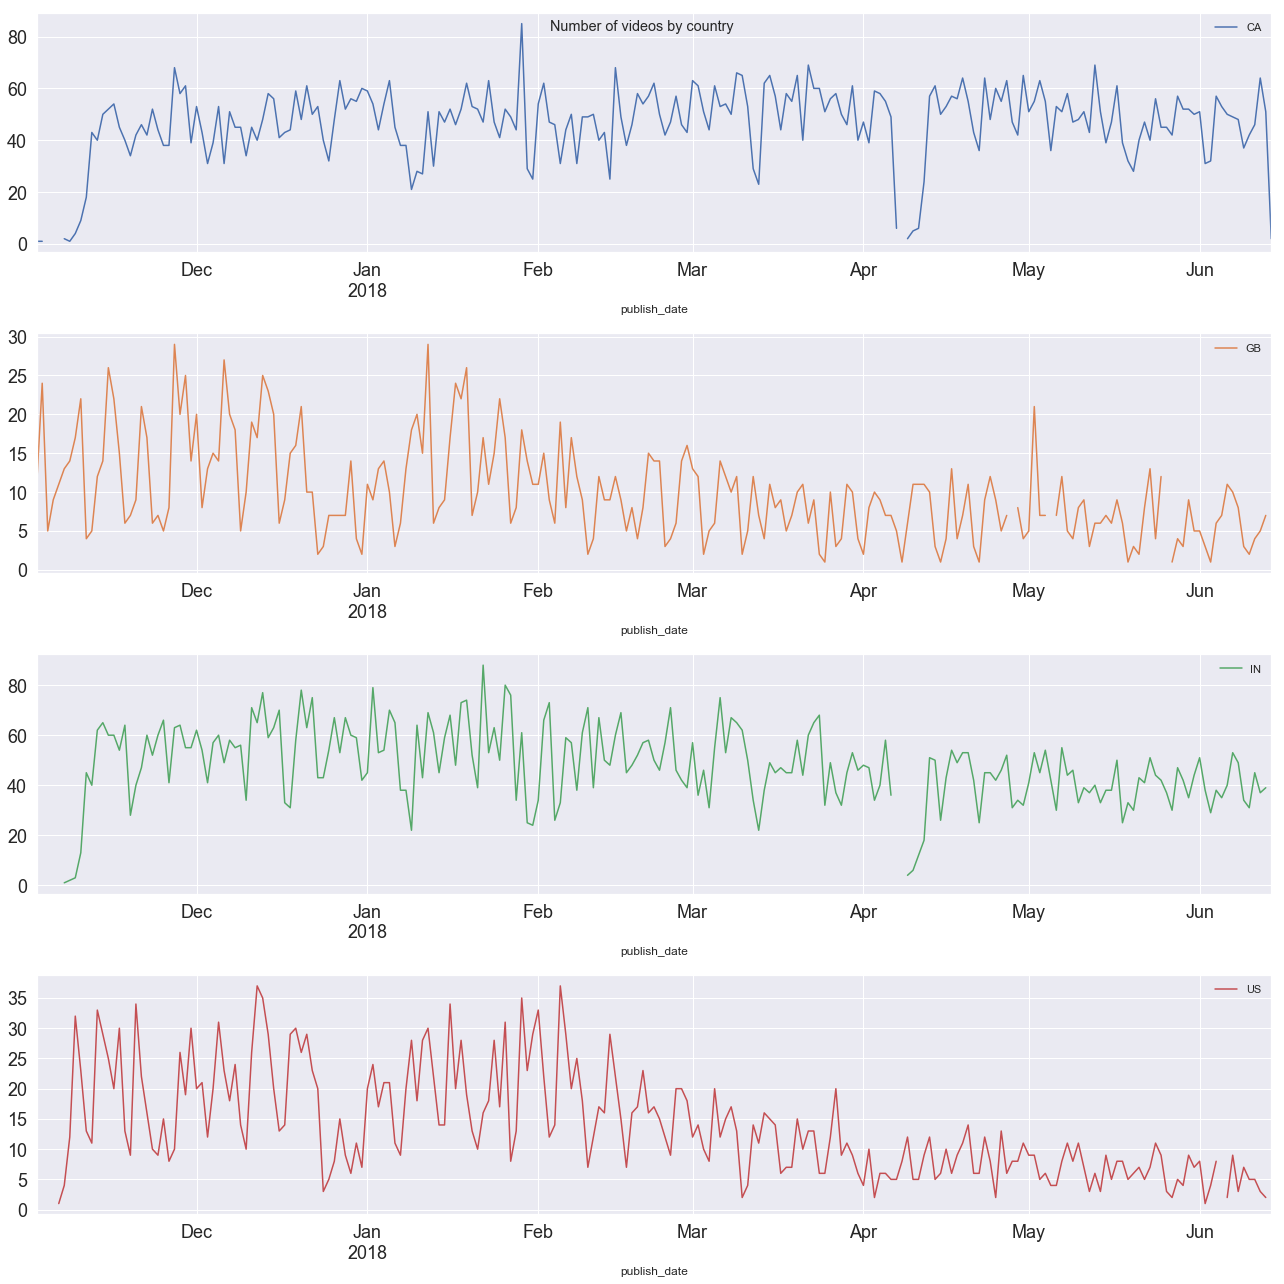

In [44]:
tmp =latest_data.groupby(['publish_date','country_code']).size().reset_index()
tmp.pivot_table(index='publish_date',columns='country_code',values=0).plot(subplots=True,
                                                                          figsize=(18,18),
                                                                          title='Number of videos by country',
                                                                          sharex=False,
                                                                          fontsize=18)
plt.tight_layout()

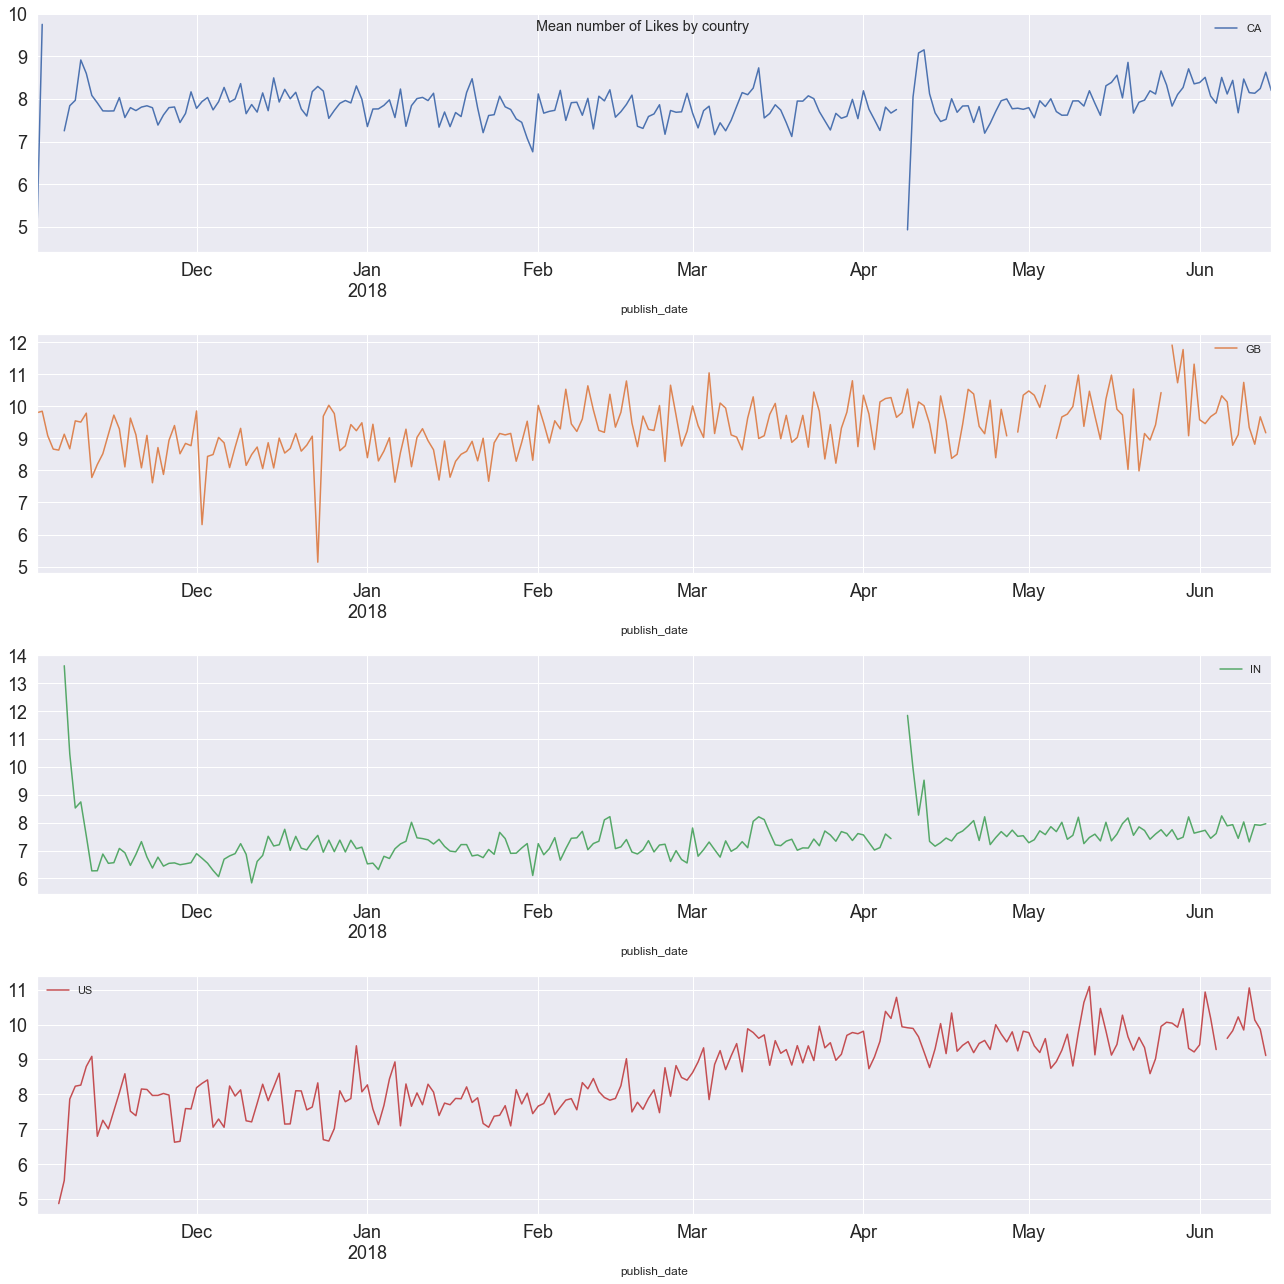

In [45]:
tmp =latest_data.groupby(['publish_date','country_code'])['likes'].mean().reset_index()
tmp.pivot_table(index='publish_date',columns='country_code',values='likes').plot(subplots=True,
                                                                          figsize=(18,18),
                                                                          title='Mean number of Likes by country',
                                                                          sharex=False,
                                                                          fontsize=18)
plt.tight_layout()

In [46]:
train['dayofweek'] = train['publish_date'].dt.dayofweek

In [47]:
n_videos_per_day_of_week = train['dayofweek'].value_counts().sort_index().reset_index()
n_videos_per_day_of_week.columns = ['day_of_week','num_videos']
n_videos_per_day_of_week['day_of_week'] = ['Mon','Tue','Wed','Thur','Fri','Sat','Sun']
n_videos_per_day_of_week

day_of_week  num_videos
0         Mon        3824
1         Tue        3876
2         Wed        3874
3        Thur        4045
4         Fri        4206
5         Sat        3330
6         Sun        2906

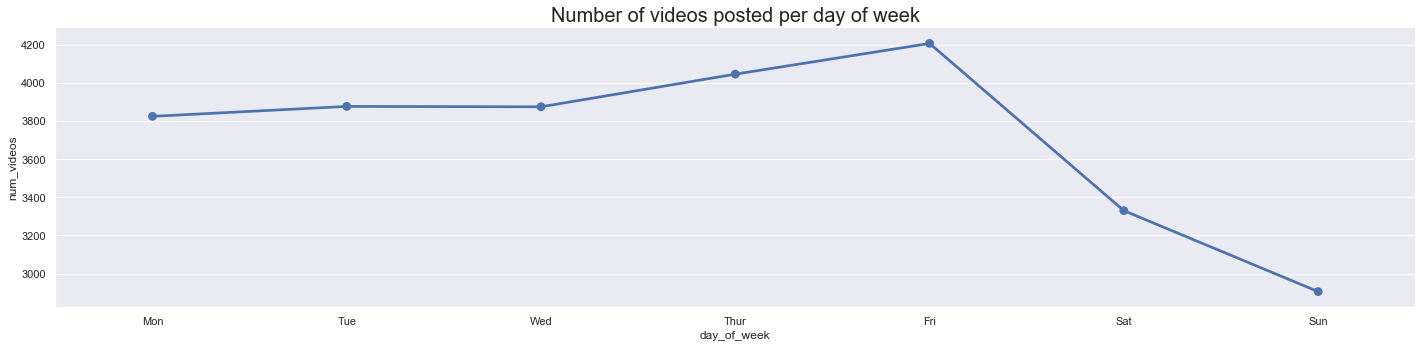

In [48]:
sns.catplot(data=n_videos_per_day_of_week, x='day_of_week', y='num_videos', kind='point',aspect=24/6)
plt.title('Number of videos posted per day of week',fontsize=20)
plt.tight_layout()

In [49]:
text_cols = ['title','tags','description']

In [50]:
from wordcloud import WordCloud, STOPWORDS

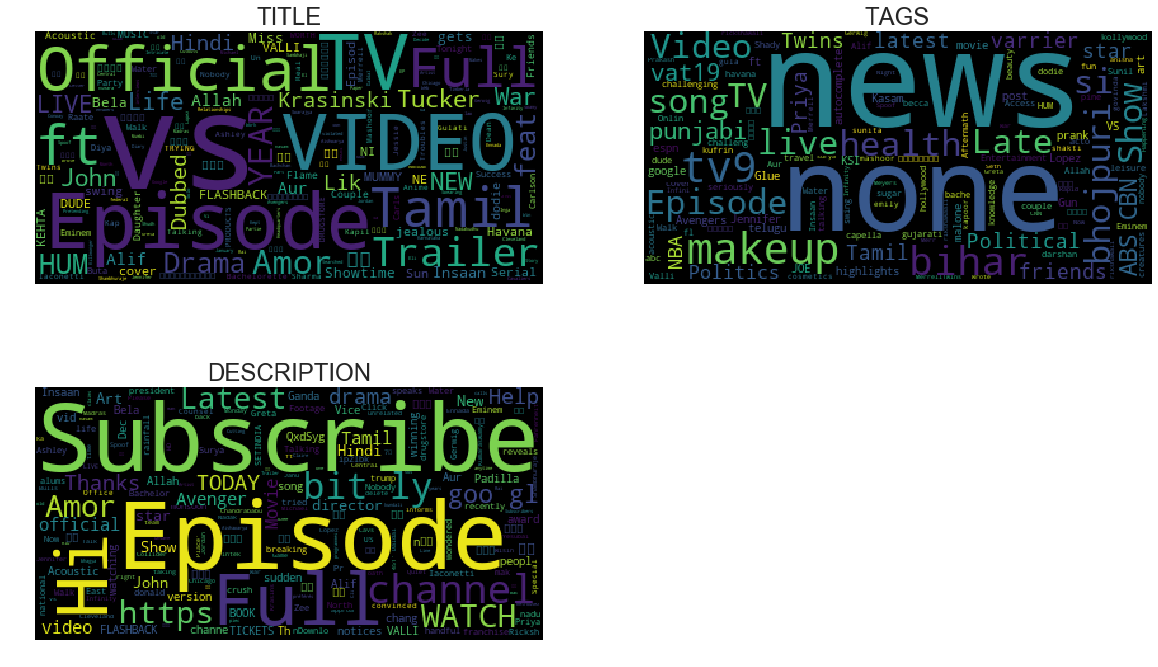

In [51]:
wc = WordCloud(stopwords=set(list(STOPWORDS)+['|']),random_state=42)
fig, axes = plt.subplots(2,2,figsize=(20,12))
axes = [ax for axes_row in axes for ax in axes_row]

for i,c in enumerate(text_cols):
    op= wc.generate(str(train[c]))
    axes[i].imshow(op)
    axes[i].set_title(c.upper(), fontsize=24)
    axes[i].axis('off')
    
fig.delaxes(axes[3])

In [52]:
train['likes'].describe()

count    26061.000000
mean         7.739954
std          1.927899
min          0.000000
25%          6.527958
50%          7.840706
75%          9.054154
max         15.171369
Name: likes, dtype: float64

In [53]:
100 * ((train['likes']>10).sum()/train.shape[0])

10.694140669966616

In [61]:
def plot_countrywise(country_code = 'IN'):
  country = train[train['country_code'] == country_code]
  country = country[country['likes'] > 10]
  fig, axes = plt.subplots(2, 2, figsize=(20, 12))
  axes = [ax for axes_row in axes for ax in axes_row]

  for i, c in enumerate(text_cols):
    op = wc.generate(str(country[c]))
    axes[i].imshow(op)
    axes[i].set_title(c.upper(), fontsize=24)
    axes[i].axis('off')

  fig.delaxes(axes[3])
  plt.suptitle(f"Country Code: '{country_code}'", fontsize=30)

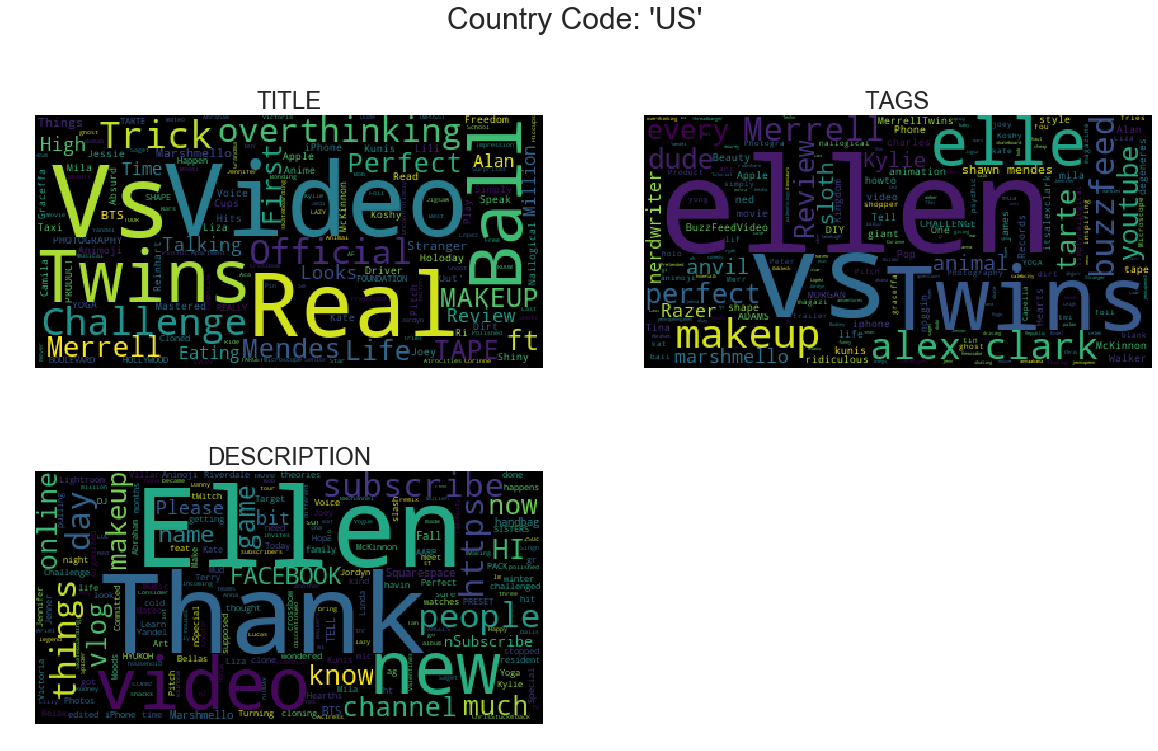

In [63]:
plot_countrywise('US')

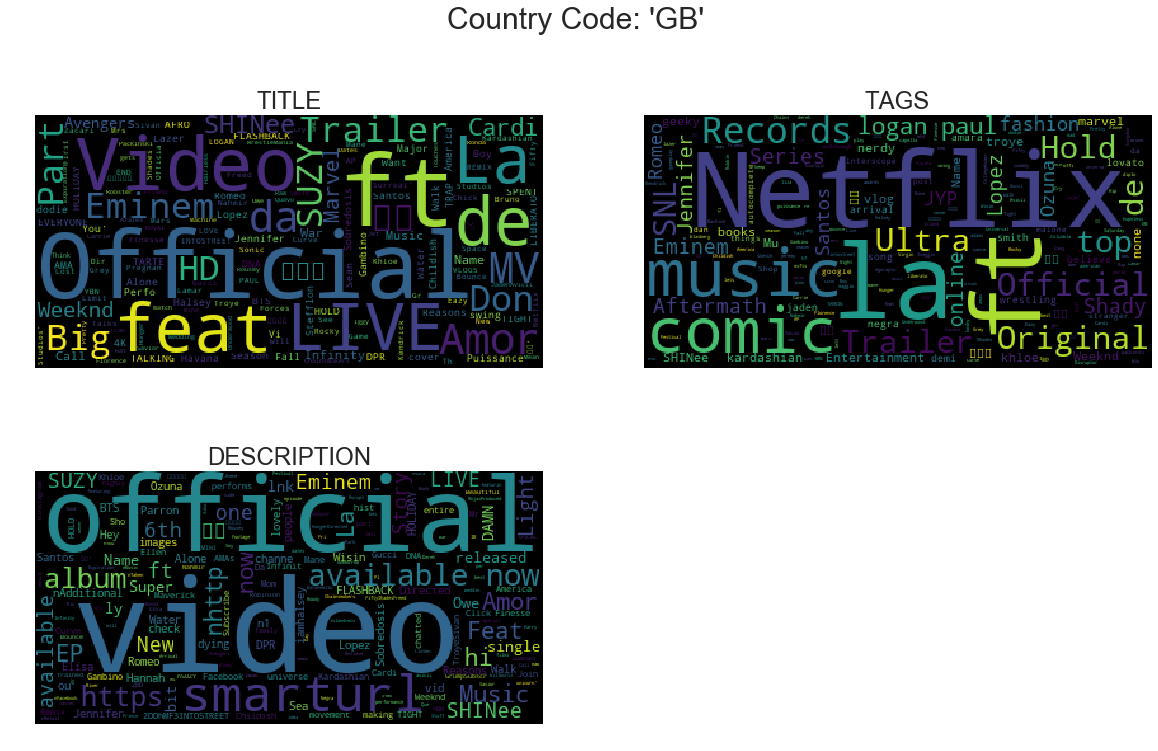

In [64]:
plot_countrywise('GB')

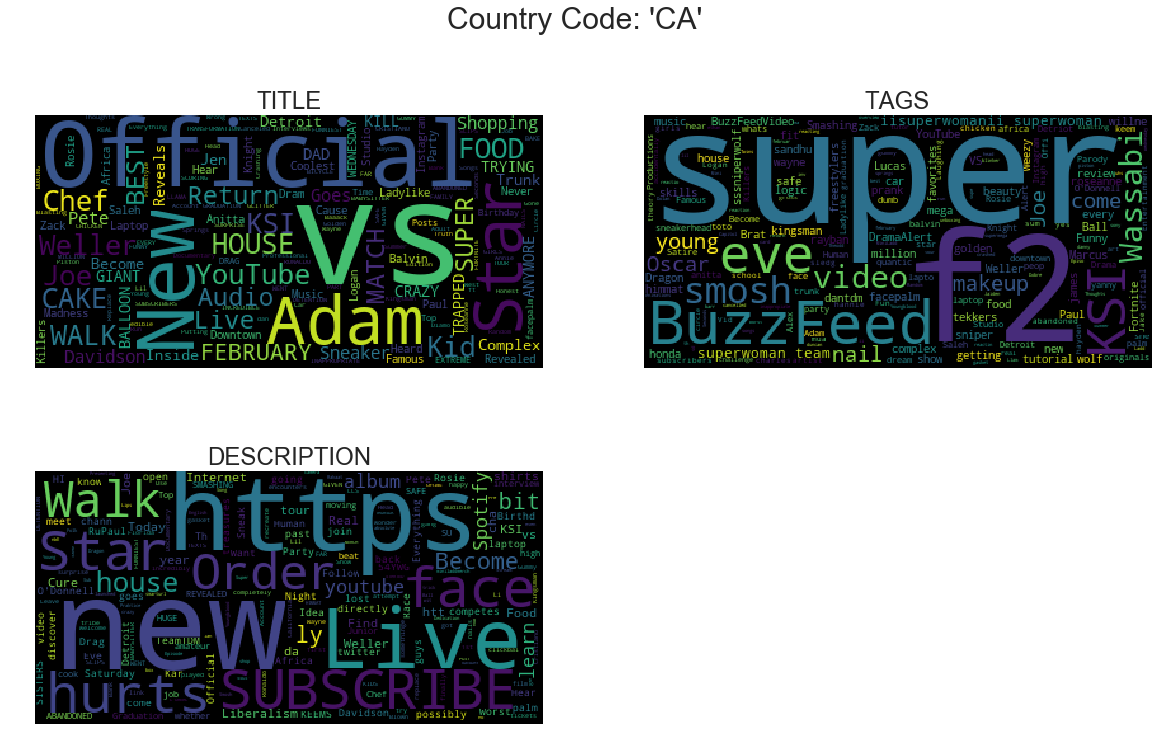

In [65]:
plot_countrywise('CA')

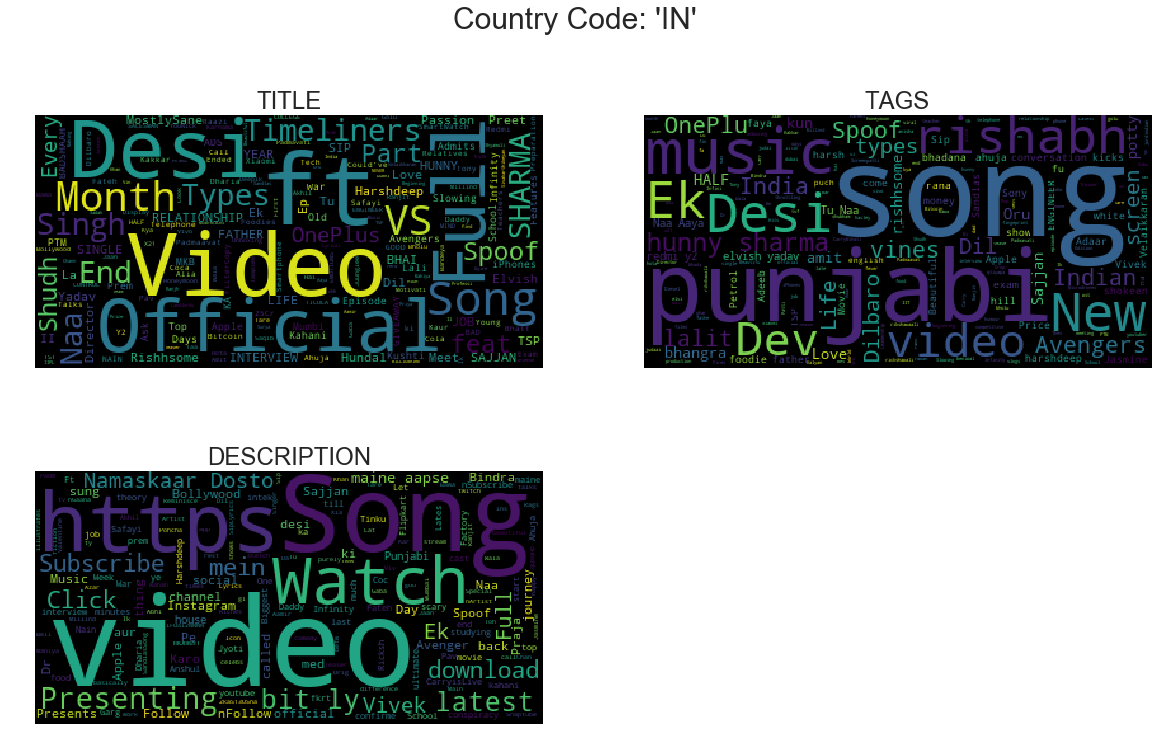

In [66]:
plot_countrywise()

In [67]:
train['title_len'] = train['title'].apply(lambda x: len(x))
train['description_len'] = train['description'].apply(lambda x: len(x))
train['tags_len'] = train['tags'].apply(lambda x: len(x))
train['channel_title_len'] = train['channel_title'].apply(lambda x: len(x))

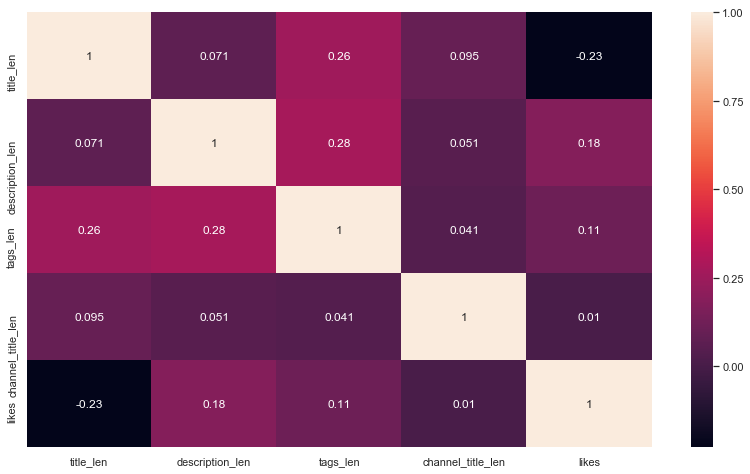

In [68]:
sns.heatmap(train[['title_len', 'description_len','tags_len','channel_title_len','likes']].corr(), annot = True)

In [70]:
#Done EDA

In [71]:
def download_preds(preds_test, file_name='hacklive_sub.csv'):
    ss['likes']=preds_test
    ss.to_csv(file_name,index=False)

In [73]:
train = pd.read_csv('train_dPrl03o/train.csv')
test = pd.read_csv('test_mPTIhGU/test.csv')

train[num_cols + ['likes']] = train[num_cols + ['likes']].apply(lambda x: np.log1p(x))
test[num_cols]= test[num_cols].apply(lambda x: np.log1p(x))

In [74]:
from sklearn.metrics import mean_squared_error

In [ ]:
def av_metric(y_true,y_pred):
    return 1000 * np.sqrt(mean_squared_error(y_true,y_pred))